Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Saving 6.67 x 6.67 in image



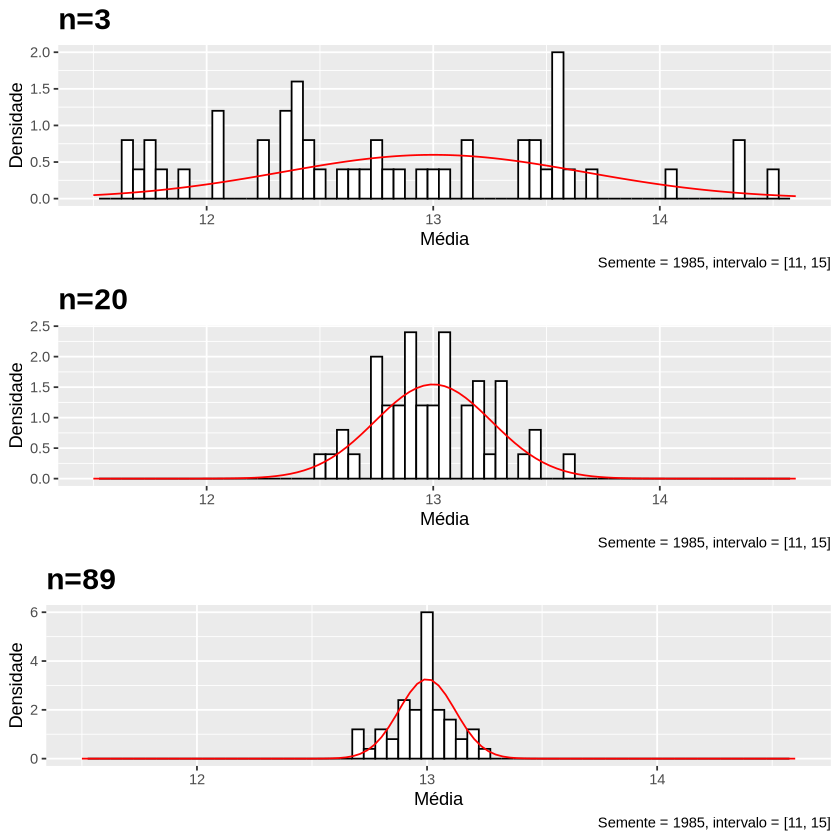

In [3]:
library(ggplot2)
library("gridExtra")
set.seed(1985)
generate <- function(num) {
    all_avgs <- c()
    for (i in 1:50) {
        sample <- runif(num, 11, 15)
        avg <- mean(sample)
        all_avgs <- c(all_avgs, avg)
    }
    df <- data.frame(values = all_avgs)
    vesp <- (11+15)/2
    var <- 1/12 * (15 - 11)^2
    plot <- ggplot(df, aes(x = values)) +
                geom_histogram(aes(y = ..density..), binwidth = 0.05, color = "black", fill = "white") +
                xlim(11.5, 14.6) +
                stat_function(fun = dnorm, args = list(mean = vesp, sd = sqrt(var/num)), color = "red") +
                labs(y = "Densidade", x = "Média", title = sprintf("n=%s", num), caption = "Semente = 1985, intervalo = [11, 15]") +
                theme(plot.title = element_text(size = 18, face ="bold"))
  return(plot)
}
df1_plot <- generate(3)
df2_plot <- generate(20)
df3_plot <- generate(89)
all_plots <- grid.arrange(df1_plot, df2_plot, df3_plot, ncol = 1)
ggsave("plots.png", all_plots)